## Audio Forensics for Maritime Recognition

In [28]:
### Dont Touch This Unless you want to change the access password
from notebook.auth import passwd
passwd()
###

Enter password: ········
Verify password: ········


'sha1:0a0cc3b54bf0:24f75bfe066c3ea9b79a38b1ff55ce9cc69b56e1'

In [9]:
!conda install -y -c conda-forge librosa

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda3_410:
#
librosa                   0.5.1                    py35_1    conda-forge


In [5]:
!pip install --upgrade audioread

  Running setup.py bdist_wheel for audioread ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/47/cc/d8/e1476000d1720a72117ef5c0b1a51388b8567ebfface47ede7
Successfully built audioread
  Found existing installation: audioread 2.1.4
    DEPRECATION: Uninstalling a distutils installed project (audioread) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling audioread-2.1.4:
      Successfully uninstalled audioread-2.1.4


In [2]:
!pip install Wand

    100% |################################| 71kB 1.1MB/s ta 0:00:011
  Running setup.py bdist_wheel for Wand ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/18/40/0d/27d632088ea23dfb9a275da88e26bd992fd01b4e03a81ce5e2
Successfully built Wand


In [7]:
!conda install -yc conda-forge ffmpeg

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda3_410:
#
ffmpeg                    3.2.4                         1    conda-forge


### Attempting to setup Tensorflow for use

In [4]:
import tensorflow as tf
mammal = tf.Variable("Elephant", tf.string)
tf.rank(mammal)

<tf.Tensor 'Rank:0' shape=() dtype=int32>

### Scraping Attempt for the collection of the following data:
    ### Marine Birds
    ### Commercial Boats, 
    ### Military Boats, 
    ### Commercial Airplanes, 
    ### Military Airplanes

#### Created a utility function for html gathering from specific file indexes, regex matching and string cleanup before retrieval.

In [2]:
import os
import re

def get_regex_from_html(regex_pattern, prefix, filter_start = 0, filter_end = None, parent_directory=os.getcwd()): 
    ls = set()
    # main_dir = 'E:\Machine_Learning_For_Signal_Processing\BirdSoundsHTML'
    for filename in os.listdir(parent_directory):
        full_filename = parent_directory + '//' + filename
        if os.path.isfile(full_filename) and filename.startswith(prefix) and filename.endswith('txt'):
            with open(full_filename) as file_:
                ls |= set(map(lambda x: x[filter_start:filter_end], re.findall(regex_pattern, file_.read())))
    print '\n'.join(ls)

#### Scraping Bird Sounds from https://www.floridamuseum.ufl.edu/bird-sounds/

    # Traversed the source code of the page and changed the inspect element dropdown for # of results to add `<option value="500">500</option>`.
    # Selected the Charadriiformes Order since most North American Shorebirds fall into that category
    # Leveraged the utility function for cleanup and retrieval using a regex filter as given below.

In [3]:
get_regex_from_html("https.*.mp3", 'CombinedBirdSoundsHTML')

https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH19781.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH00802.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH08931.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH14034.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH22027.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH00147.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH07312.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH21039.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH22439.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH09473.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH20011.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH04401.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH16236.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH05893.mp3
https://www.floridamuseum.ufl.edu/bird-sounds/mp3/FLMNH14384.mp3
https://www.floridamuseum

#### Scraping Boat Engines from http://www.nadaguides.com
    # Queried duck duck go and supplied the following query `site:http://www.nadaguides.com/Boats "Outboard-Motors"` {It was non-trivial to setup a zero cost API call to Google/Bing that didn't wouldn't run out of balance during the middle of the project}
    # Expanded the entire page and saved the html. 
    # Leveraged the utility function for cleanup and retrieval using a regex filter.

In [4]:
get_regex_from_html("href=\"http://www.nadaguides.com/Boats/\d+/.*?\"", 'OutboardMotorsHTML', 6, -1)

http://www.nadaguides.com/Boats/2015/Mercury/Outboard-Motors
http://www.nadaguides.com/Boats/1996/Tohatsu/Outboard-Motors
http://www.nadaguides.com/Boats/1976/JOHNSON/Outboard-Motors
http://www.nadaguides.com/Boats/2003/SUZUKI/Outboard-Motors
http://www.nadaguides.com/Boats/2002/Mercury/Outboard-Motors
http://www.nadaguides.com/Boats/2011/Evinrude/Outboard-Motors
http://www.nadaguides.com/Boats/2008/SUZUKI/Outboard-Motors
http://www.nadaguides.com/Boats/2015/Suzuki/Outboard-Motors
http://www.nadaguides.com/Boats/2016/Evinrude/Outboard-Motors
http://www.nadaguides.com/Boats/2012/Suzuki/Outboard-Motors
http://www.nadaguides.com/Boats/1980/MERCURY/Outboard-Motors
http://www.nadaguides.com/Boats/2001/Mercury/Outboard-Motors
http://www.nadaguides.com/Boats/2001/TOHATSU/Outboard-Motors
http://www.nadaguides.com/Boats/1984/MERCURY/Outboard-Motors
http://www.nadaguides.com/Boats/2001/SUZUKI/Outboard-Motors
http://www.nadaguides.com/Boats/2012/Tohatsu/Outboard-Motors
http://www.nadaguides.com/B

### Details for Coast Guard Vehicles at the below link
### http://www.overview.uscg.mil/Portals/6/Documents/PDF/CG_Cutters-Boats-Aircraft_2015-2016_edition.pdf

In [11]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('http://www.overview.uscg.mil/Portals/6/Documents/PDF/CG_Cutters-Boats-Aircraft_2015-2016_edition.pdf', size=(300, 250))

In [ ]:
from tensorflow.contrib.signal import hann_window, stft
# Frame len guessed
# frame_step assumed to be hop size
spectrum = stft(signal = s`, fft_size = 2048, frame_len = 256, frame_step = 256, pad_end=False, window_fn=functools.partial(window_ops.hann_window, periodic=True))

### Possible Dataset for marine bird sounds
https://catalog.data.gov/dataset/nodc-standard-format-marine-birds-from-coastal-alaska-and-puget-sound-data-1974-1982-feeding-fl/resource/181532e5-2456-4a5a-a596-ff8d1f1134cc

## Tensorflow to read MP3 audio and create spectrogram(<i>Unsuccessful </i>)

(8188841, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[ 0.          0.00390625  0.0078125   0.01171875  0.015625    0.01953125
  0.0234375   0.02734375  0.03125     0.03515625  0.0390625   0.04296875
  0.046875    0.05078125  0.0546875   0.05859375  0.0625      0.06640625
  0.0703125   0.07421875  0.078125    0.08203125  0.0859375   0.08984375
  0.09375     0.09765625  0.1015625   0.10546875  0.109375    0.11328125
  0.1171875   0.12109375  0.125       0.12890625  0.1328125   0.13671875
  0.140625    0.14453125  0.1484375   0.15234375  0.15625     0.16015625
  0.1640625   0.16796875  0.171875    0.17578125  0.1796875   0.18359375
  0.1875      0.19140625  0.1953125   0.19921875  0.203125    0.20703125
  0.2109375   0.21484375  0.21875     0.22265625  0.2265625   0.23046875
  0.234375    0.23828125  0.2421875   0.24609375  0.25        0.25390625
  0.2578125   0.26171875  0.265625    0.26953125  0.2734375   0.27734375
  0.28125     0.28515625  0.2890625   0.29296875  0.296875    0.30078125
  0.30468

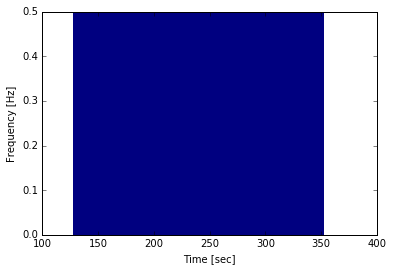

In [24]:
# !echo 'mlsp@2017' | sudo -S apt-get install ffmpeg



# import librosa
# import os
# src, sr = librosa.load(os.getcwd()+'/FLMNH09473.mp3', sr=SR, duration=8.0)  # whole signal    
# src = src[:duration*SR]

import tensorflow as tf
import os

sample_rate = 16000.0
# A Tensor of [batch_size, num_samples] mono PCM samples in the range [-1, 1].
pcm = tf.placeholder(tf.float32, [None, None])

# A 1024-point STFT with frames of 64 ms and 75% overlap.
stfts = tf.contrib.signal.stft(pcm, frame_length=1024, frame_step=256,
                               fft_length=1024)

with tf.Session() as sess:
    audio_binary = tf.read_file(os.getcwd()+'/FLMNH09473.mp3')
    waveform = tf.contrib.ffmpeg.decode_audio(audio_binary, file_format='mp3', samples_per_second=44100, channel_count=1)
    print(waveform.eval().shape)
    print(waveform.eval()[1:5])
    f, t, Sxx = signal.spectrogram(x=waveform.eval()[1:500].flatten())
    print(f, t, Sxx)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    # sess.run(stfts, feed_dict={pcm: waveform.eval()})

## Audio Capture and spectrogram representation using Librosa

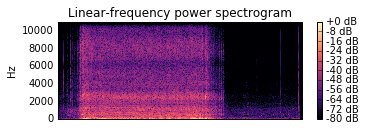

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
y, sr = librosa.load("Cessna 172 - Engine Change Start Up.wav")
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

## Commented code for scaling linear frequencies into mel scale

In [ ]:

# spectrograms = tf.abs(stft)

# # Warp the linear scale spectrograms into the mel-scale.
# num_spectrogram_bins = stfts.shape[-1].value
# lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 80
# linear_to_mel_weight_matrix = tf.contrib.signal.linear_to_mel_weight_matrix(
#   num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz,
#   upper_edge_hertz)
# mel_spectrograms = tf.tensordot(
#   spectrograms, linear_to_mel_weight_matrix, 1)
# mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(
#   linear_to_mel_weight_matrix.shape[-1:]))

# # Compute a stabilized log to get log-magnitude mel-scale spectrograms.
# log_mel_spectrograms = tf.log(mel_spectrograms + 1e-6)

# # Compute MFCCs from log_mel_spectrograms and take the first 13.
# mfccs = tf.contrib.signal.mfccs_from_log_mel_spectrograms(
#   log_mel_spectrograms)[..., :13]

## Gaussian Mixture Model Implementation in scikit-learn 

In [6]:
import random
import numpy as np
from sklearn.mixture import GaussianMixture as GMM

x = np.array([[random.random() for i in range(198)] for j in range(2384)])
gmm = GMM(n_components=200)
gmm.fit(x)

Y = gmm.predict(x)

print(len(Y))
# print '|'.join(map(str, Y))

2384


## Gaussian Mixture Model implementation in Tensorflow(<i>Runs Out Of Memory</i>)

In [ ]:
from tensorflow.contrib.factorization.python.ops import gmm as gmm_lib
from tensorflow.python.framework import constant_op
import random
import numpy as np


def input_fn(x):
    """Returns an input_fn that randomly selects batches from given points."""
    def _fn():
        return constant_op.constant(x.astype('float32')), None
    return _fn

x = np.array([[random.random() for i in range(198)] for j in range(2384)], dtype=np.float32)
gmm = gmm_lib.GMM(200, random_seed=0)
gmm.fit(input_fn=input_fn(x), max_steps=300)

y = gmm.predict_assignments(input_fn=input_fn(x))
print(len(y))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_model_dir': '/tmp/tmpndupoygj', '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f239958deb8>, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_log_step_count_steps': 100, '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_session_config': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpndupoygj/model.ckpt.
INFO:tensorflow:step = 1, loss = 38553.6


## Pyspark Streaming implementation of GMMs

In [21]:
import numpy as np

from pyspark.ml import Pipeline
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

def create_fake_data_for_test():
    n_samples = 300
    np.random.seed(0)

    shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
    
    C = np.array([[0., -0.7], [3.5, .7]])
    stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
    
    return np.vstack([shifted_gaussian, stretched_gaussian])

X_train = create_fake_data_for_test()
dataset = spark.createDataFrame(X_train.tolist(), ["x1", "x2"])

vecAss = VectorAssembler(inputCols=["x1", "x2"], outputCol="features")
gm = GaussianMixture().setK(2)
pipeline = Pipeline(stages=[vecAss, gm])

model = pipeline.fit(dataset)


predictions = model.transform(dataset).select("prediction").rdd.map(lambda x: x[0]).collect()
print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
!conda install -yc conda-forge pyspark

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_410:

The following NEW packages will be INSTALLED:

    py4j:    0.10.6-py35_1 conda-forge
    pyspark: 2.2.0-py35_0  conda-forge

py4j-0.10.6-py 100% |################################| Time: 0:00:00   1.16 MB/s
pyspark-2.2.0- 100% |################################| Time: 0:00:05  32.15 MB/s
